## とりあえず可視化

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

from sentence_transformers import SentenceTransformer
from scipy.interpolate import griddata
import matplotlib.cm as cm

op = ["I agree with the idea that 'husbands should work outside the home and wives should take care of the home'.", 
"I rather agree with the idea that 'husbands should work outside the home and wives should take care of the home'.", 
"I rather disagree with the idea that 'husbands should work outside the home and wives should take care of the home'.", 
"I disagree with the idea that 'husbands should work outside the home and wives should take care of the home'."]

model = SentenceTransformer('all-MiniLM-L6-v2')

gend = model.encode(op)

weights = gend
vec = weights.tolist()

df1 = pd.DataFrame(op, columns=['sentence'])
df = pd.DataFrame((vec[i] for i in range(0, 4)), index=df1)


# Computing the correlation matrix
X_corr = df.corr()
# Computing eigen values and eigen vectors
values, vectors = np.linalg.eig(X_corr)
# Sorting the eigen vectors coresponding to eigen values in descending order
args = (-values).argsort()
values = vectors[args]
vectors = vectors[:, args]
# Taking first 2 components which explain maximum variance for projecting
new_vectors = vectors[:,:2]

# Projecting it onto new dimesion with 2 axis
neww_X = np.dot(vec, new_vectors)

# Importing survey data
data = pd.read_excel('domestic.xlsx')
data.head()

,調査,賛成,どちらかといえば賛成,どちらかといえば反対,反対,わからない
0,1979年5月調査,29.1,41.0,18.3,4.5,7.1
1,1992年11月調査,19.8,35.8,26.4,11.9,6.1
2,1997年9月調査,17.9,34.0,26.9,16.7,4.6
3,2002年7月調査,12.8,30.5,29.4,21.7,5.6
4,2004年11月調査,11.0,30.2,29.5,24.2,5.0


[ 0.12740589  0.0113432  -0.14667824 -0.08955226] [-0.00942899 -0.15600931 -0.07633905  0.06625888] [29.1, 41.0, 18.3, 4.5]


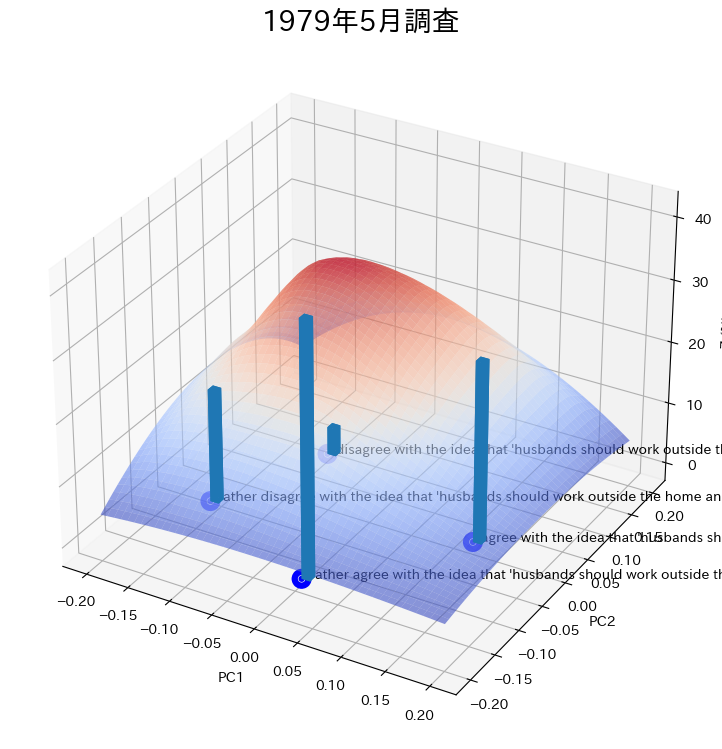

In [201]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.cm as cm

# set up the figure and axes
fig = plt.figure(figsize=(10, 20))
ax2 = fig.add_subplot(211, projection='3d')

ax2.scatter(neww_X[:,0],neww_X[:,1], [0,0,0,0], linewidths=10, color='blue')
# ax2.xlim(-0.25, 0.25)
# ax2.ylim(-0.25, 0.25)
# ax2.xlabel("PC1",size=15)
# ax2.ylabel("PC2",size=15)

vocab=op
for i, word in enumerate(vocab):
  ax2.text(neww_X[i,0], neww_X[i,1], 0, word, zdir=None)

# calculate potential
year1979 = pd.DataFrame({data.iloc[0, 0] : data.iloc[0, 1:]})
year1979['pot'] = -np.log(year1979.iloc[:, 0].astype(np.float64)/100)

# bar graph code
x, y, z = neww_X[:,0], neww_X[:,1], year1979.iloc[:-1, 0].astype(np.float64).tolist()
print(x, y, z)
top = z
bottom = np.zeros_like(top)
width = 0.01
depth = 0.01
ax2.bar3d(x, y, bottom, width, depth, top, shade=False)

# border condition
# 4 corner dots
dum = [-0.2, 0.2, -0.2, 0.2]
dumy = [-0.2, 0.2, 0.2, -0.2]

xx = neww_X[:,0].tolist()
yy = neww_X[:,1].tolist()

for l in range(len(dum)):
    xx.append(dum[l]) 
    yy.append(dumy[l])

zz = 10*year1979.iloc[:-1, 1]
zz = zz.to_list()
for m in range(len(dum)):
    zz.append(-np.log(1/100))

# # surface plot code
X, Y, Z = xx, yy, zz

points = np.array([X, Y]).T

# # create a grid of coordinates between the minimum and
# # maximum of your X and Y. 50j indicates 50 discretization
# # points between the minimum and maximum.
X_grid, Y_grid = np.mgrid[-0.2:0.2:50j, -0.2:0.2:50j]
# # interpolate your values on the grid defined above
Z_grid = griddata(points, Z, (X_grid, Y_grid), method='cubic')

ax2.plot_surface(X_grid, Y_grid, Z_grid, cmap=cm.coolwarm, 
                       linewidth=0, antialiased=True, alpha=.6)

# ax2.view_init(elev= 25, azim=15, roll=0)

ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('Z (%)')
ax2.set_title("1979年5月調査",size=20)

# plt.savefig("domestic_pot_1979.png")
plt.show()

In [72]:
year1979

,1979年5月調査,pot
賛成,29.1,1.234432
どちらかといえば賛成,41.0,0.891598
どちらかといえば反対,18.3,1.698269
反対,4.5,3.101093
わからない,7.1,2.645075


In [142]:
Z_grid[0]

array([ 4.60517019,  5.26560904,  5.90772574,  6.53093329,  7.1346447 ,
        7.718273  ,  8.28123119,  8.82293229,  9.3427893 ,  9.84021525,
       10.31462315, 10.765426  , 11.19203683, 11.59386865, 11.97033446,
       12.32084729, 12.64482014, 12.94166603, 13.21079797, 13.45162898,
       13.66357206, 13.84604024, 13.99844652, 14.12020393, 14.21072546,
       14.26942414, 14.29571297, 14.28900498, 14.24871317, 14.17425056,
       14.06503015, 13.92046498, 13.73996804, 13.52295235, 13.26883092,
       12.97701678, 12.64692292, 12.27796236, 11.86954812, 11.42109322,
       10.93201065, 10.40171344,  9.8296146 ,  9.21512715,  8.55766409,
        7.85663843,  7.11146321,  6.32155141,  5.48631607,  4.60517019])

In [107]:
# 虚部の削除
neww_X = np.real(neww_X)
neww_X

array([[ 0.12740589, -0.00942899],
       [ 0.0113432 , -0.15600931],
       [-0.14667824, -0.07633905],
       [-0.08955226,  0.06625888]])

### 閾値平面の挿入

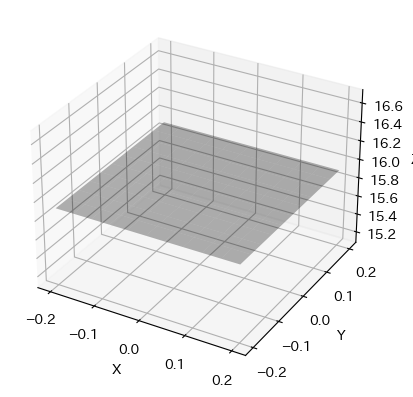

In [71]:
myval = np.average(Z_grid)

x = np.linspace(-0.2, 0.2, 11)
y = np.linspace(-0.2, 0.2, 11)
X, Y = np.meshgrid(x, y)
z = np.array([myval] * X.shape[0])
Z = np.array(([z] * X.shape[0]))
# print(Z)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.plot_surface(X, Y, Z, color='black', alpha=0.3)

plt.show()

### ポテンシャルが平均以下の人が泳ぐとする　トライ1

#### 初期状態

In [102]:
swimmerx = []
swimmery = []

for i in range(Z_grid.shape[0]):
    for j in range(Z_grid.shape[1]):
        if Z_grid[i][j] < np.average(Z_grid):
            swimmerx.append(np.linspace(-0.2, 0.2, 50)[i])
            swimmery.append(np.linspace(-0.2, 0.2, 50)[j])
    
print(len(swimmerx))
np.array(swimmerx)

1341


array([-0.2, -0.2, -0.2, ...,  0.2,  0.2,  0.2])

[ 0.12740589  0.0113432  -0.14667824 -0.08955226] [-0.00942899 -0.15600931 -0.07633905  0.06625888] [29.1, 41.0, 18.3, 4.5]


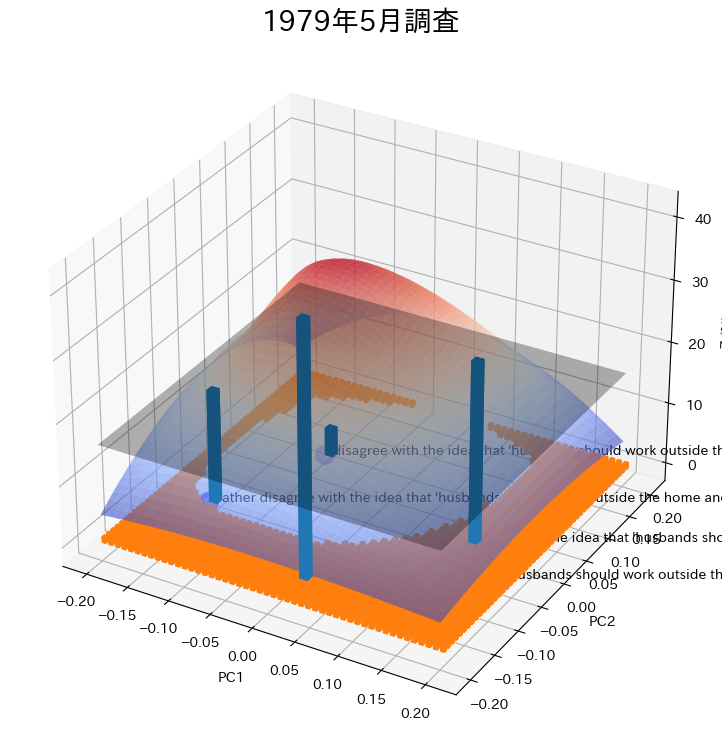

In [139]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.cm as cm

# set up the figure and axes
fig = plt.figure(figsize=(10, 20))
ax2 = fig.add_subplot(211, projection='3d')

ax2.scatter(neww_X[:,0],neww_X[:,1], [0,0,0,0], linewidths=10, color='blue')
# ax2.xlim(-0.25, 0.25)
# ax2.ylim(-0.25, 0.25)
# ax2.xlabel("PC1",size=15)
# ax2.ylabel("PC2",size=15)

vocab=op
for i, word in enumerate(vocab):
  ax2.text(neww_X[i,0], neww_X[i,1], 0, word, zdir=None)

# calculate potential
year1979 = pd.DataFrame({data.iloc[0, 0] : data.iloc[0, 1:]})
year1979['pot'] = -np.log(year1979.iloc[:, 0].astype(np.float64)/100)

# bar graph code
x, y, z = neww_X[:,0], neww_X[:,1], year1979.iloc[:-1, 0].astype(np.float64).tolist()
print(x, y, z)
top = z
bottom = np.zeros_like(top)
width = 0.01
depth = 0.01
ax2.bar3d(x, y, bottom, width, depth, top, shade=False)

# swimmer points code
top = np.ones((1341))
bottom = np.zeros_like(top)
width = 0.005
depth = 0.005
ax2.bar3d(np.array(swimmerx), np.array(swimmery), bottom, width, depth, top, shade=False)

# border condition
# 4 corner dots
dum = [-0.2, 0.2, -0.2, 0.2]
dumy = [-0.2, 0.2, 0.2, -0.2]

xx = neww_X[:,0].tolist()
yy = neww_X[:,1].tolist()

for l in range(len(dum)):
    xx.append(dum[l]) 
    yy.append(dumy[l])

zz = 10*year1979.iloc[:-1, 1]
zz = zz.to_list()
for m in range(len(dum)):
    zz.append(-np.log(1/100))

# # surface plot code
X, Y, Z = xx, yy, zz

points = np.array([X, Y]).T

# # create a grid of coordinates between the minimum and
# # maximum of your X and Y. 50j indicates 50 discretization
# # points between the minimum and maximum.
X_grid, Y_grid = np.mgrid[-0.2:0.2:50j, -0.2:0.2:50j]
# # interpolate your values on the grid defined above
Z_grid = griddata(points, Z, (X_grid, Y_grid), method='cubic')

ax2.plot_surface(X_grid, Y_grid, Z_grid, cmap=cm.coolwarm, 
                       linewidth=0, antialiased=True, alpha=.6)

## average surface
myval = np.average(Z_grid)

x = np.linspace(-0.2, 0.2, 11)
y = np.linspace(-0.2, 0.2, 11)
X, Y = np.meshgrid(x, y)
z = np.array([myval] * X.shape[0])
Z = np.array(([z] * X.shape[0]))
ax2.plot_surface(X, Y, Z, color='black', alpha=0.3)

# ax2.view_init(elev= 25, azim=15, roll=0)

ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('Z (%)')
ax2.set_title("1979年5月調査",size=20)

# plt.savefig("domestic_pot_1979.png")
plt.show()

#### ジャンプさせてみる

In [161]:
posx = np.array(swimmerx)
posy = np.array(swimmery)
posx

array([-0.2, -0.2, -0.2, ...,  0.2,  0.2,  0.2])

In [122]:
np.random.randint(0, 180)

147

In [162]:
# みんなばらばらと動く
for i in range(len(posx)):
    distance = np.random.rand()*0.05
    angle = np.random.randint(0, 360)
    posx[i] += distance*np.cos(np.radians(angle))
    posy[i] += distance*np.sin(np.radians(angle))


In [136]:
# 端の人は外側にはいかない=一歩内側に寄る
# 距離は0.05以内で一様分布のランダム

for i in range(len(posx)):
    distance = np.random.rand()*0.05
    if posx[i] < -0.15:
        angle = np.random.randint(-90, 90)
    elif posx[i] > 0.15:
        angle = np.random.randint(90, 270)
    elif posy[i] < -0.15:
        angle = np.random.randint(0, 180)
    elif posy[j] > 0.15:
        angle = np.random.randint(180, 360)
    else:
        angle = np.random.randint(0, 360)
    # print(distance, angle)
    posx[i] += distance*np.cos(np.radians(angle))
    posy[i] += distance*np.sin(np.radians(angle))

posx

array([-0.18653945, -0.178413  , -0.19757504, ...,  0.18563406,
        0.17413102,  0.18550571])

[ 0.12740589  0.0113432  -0.14667824 -0.08955226] [-0.00942899 -0.15600931 -0.07633905  0.06625888] [29.1, 41.0, 18.3, 4.5]


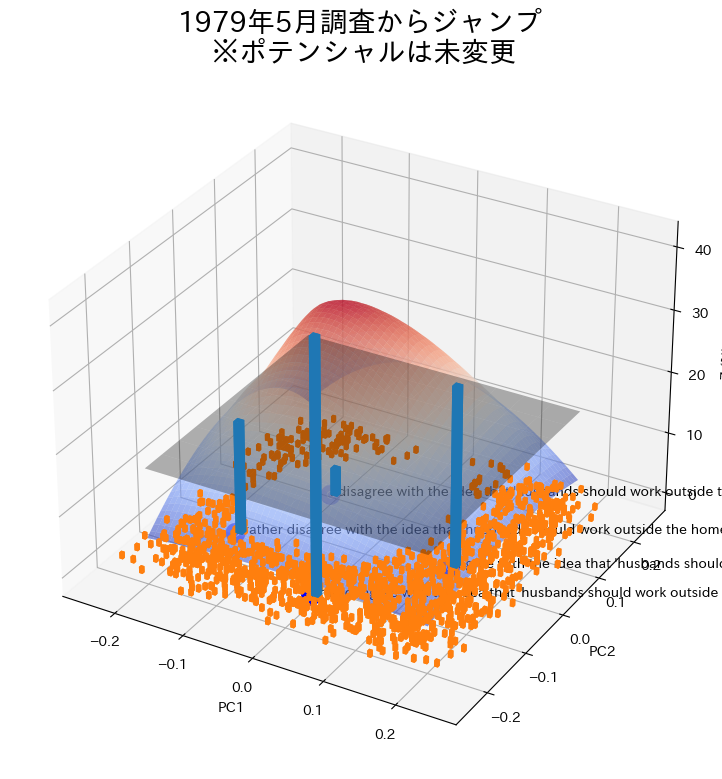

In [163]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.cm as cm

# set up the figure and axes
fig = plt.figure(figsize=(10, 20))
ax2 = fig.add_subplot(211, projection='3d')

ax2.scatter(neww_X[:,0],neww_X[:,1], [0,0,0,0], linewidths=10, color='blue')
# ax2.xlim(-0.25, 0.25)
# ax2.ylim(-0.25, 0.25)
# ax2.xlabel("PC1",size=15)
# ax2.ylabel("PC2",size=15)

vocab=op
for i, word in enumerate(vocab):
  ax2.text(neww_X[i,0], neww_X[i,1], 0, word, zdir=None)

# calculate potential
year1979 = pd.DataFrame({data.iloc[0, 0] : data.iloc[0, 1:]})
year1979['pot'] = -np.log(year1979.iloc[:, 0].astype(np.float64)/100)

# bar graph code
x, y, z = neww_X[:,0], neww_X[:,1], year1979.iloc[:-1, 0].astype(np.float64).tolist()
print(x, y, z)
top = z
bottom = np.zeros_like(top)
width = 0.01
depth = 0.01
ax2.bar3d(x, y, bottom, width, depth, top, shade=False)

# swimmer points code
top = np.ones((1341))
bottom = np.zeros_like(top)
width = 0.005
depth = 0.005
ax2.bar3d(posx, posy, bottom, width, depth, top, shade=False)

# border condition
# 4 corner dots
dum = [-0.2, 0.2, -0.2, 0.2]
dumy = [-0.2, 0.2, 0.2, -0.2]

xx = neww_X[:,0].tolist()
yy = neww_X[:,1].tolist()

for l in range(len(dum)):
    xx.append(dum[l]) 
    yy.append(dumy[l])

zz = 10*year1979.iloc[:-1, 1]
zz = zz.to_list()
for m in range(len(dum)):
    zz.append(-np.log(1/100))

# # surface plot code
X, Y, Z = xx, yy, zz

points = np.array([X, Y]).T

# # create a grid of coordinates between the minimum and
# # maximum of your X and Y. 50j indicates 50 discretization
# # points between the minimum and maximum.
X_grid, Y_grid = np.mgrid[-0.2:0.2:50j, -0.2:0.2:50j]
# # interpolate your values on the grid defined above
Z_grid = griddata(points, Z, (X_grid, Y_grid), method='cubic')

ax2.plot_surface(X_grid, Y_grid, Z_grid, cmap=cm.coolwarm, 
                       linewidth=0, antialiased=True, alpha=.6)

## average surface
myval = np.average(Z_grid)

x = np.linspace(-0.2, 0.2, 11)
y = np.linspace(-0.2, 0.2, 11)
X, Y = np.meshgrid(x, y)
z = np.array([myval] * X.shape[0])
Z = np.array(([z] * X.shape[0]))
ax2.plot_surface(X, Y, Z, color='black', alpha=0.3)

# ax2.view_init(elev= 25, azim=15, roll=0)

ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('Z (%)')
ax2.set_title("1979年5月調査からジャンプ\n ※ポテンシャルは未変更",size=20)

# plt.savefig("domestic_pot_1979.png")
plt.show()

### ポテンシャルが平均以下の人が泳ぐとする　トライ2
ポテンシャルの棒グラフがあるとすると…？
そこから隣にいったりする…？

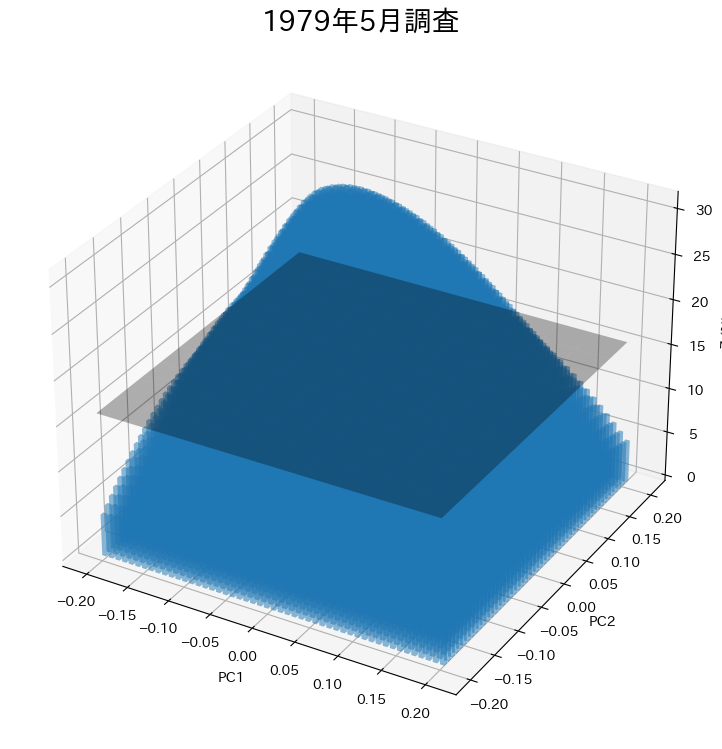

In [166]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.cm as cm

# set up the figure and axes
fig = plt.figure(figsize=(10, 20))
ax2 = fig.add_subplot(211, projection='3d')

# calculate potential
year1979 = pd.DataFrame({data.iloc[0, 0] : data.iloc[0, 1:]})
year1979['pot'] = -np.log(year1979.iloc[:, 0].astype(np.float64)/100)

# border condition
# 4 corner dots
dum = [-0.2, 0.2, -0.2, 0.2]
dumy = [-0.2, 0.2, 0.2, -0.2]

xx = neww_X[:,0].tolist()
yy = neww_X[:,1].tolist()

for l in range(len(dum)):
    xx.append(dum[l]) 
    yy.append(dumy[l])

zz = 10*year1979.iloc[:-1, 1]
zz = zz.to_list()
for m in range(len(dum)):
    zz.append(-np.log(1/100))

## potential surface plot code
X, Y, Z = xx, yy, zz

points = np.array([X, Y]).T

X_grid, Y_grid = np.mgrid[-0.2:0.2:50j, -0.2:0.2:50j]
Z_grid = griddata(points, Z, (X_grid, Y_grid), method='cubic')

# ax2.plot_surface(X_grid, Y_grid, Z_grid, cmap=cm.coolwarm, 
#                        linewidth=0, antialiased=True, alpha=.6)

## average surface
myval = np.average(Z_grid)

x = np.linspace(-0.2, 0.2, 11)
y = np.linspace(-0.2, 0.2, 11)
X, Y = np.meshgrid(x, y)
z = np.array([myval] * X.shape[0])
Z = np.array(([z] * X.shape[0]))
ax2.plot_surface(X, Y, Z, color='black', alpha=0.3)

# potential bar graph
top = Z_grid.flatten()
bottom = np.zeros_like(top)
width = 0.005
depth = 0.005
ax2.bar3d(X_grid.flatten(), Y_grid.flatten(), bottom, width, depth, top, shade=False, alpha=0.3)

# ax2.view_init(elev= 25, azim=15, roll=0)

ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('Z (%)')
ax2.set_title("1979年5月調査",size=20)

# plt.savefig("domestic_pot_1979.png")
plt.show()

### ポテンシャルが平均以下の人が泳ぐとする　トライ3
棒グラフ上の人が動くのが一番ポテンシャルは書きやすい

In [168]:
year1979

,1979年5月調査,pot
賛成,29.1,1.234432
どちらかといえば賛成,41.0,0.891598
どちらかといえば反対,18.3,1.698269
反対,4.5,3.101093
わからない,7.1,2.645075


In [175]:
init = year1979.iloc[:-1, 0].astype(np.float64).tolist()
init

[29.1, 41.0, 18.3, 4.5]

In [219]:
chg = []

for i in range(len(init)):
    if i < 2:
        inc = 5*np.random.rand()-5
    else:
        inc = 5*np.random.rand()
    print(inc, init[i])
    chg.append(init[i]+inc)

chg

-2.7109948647416293 29.1
-3.2213831731461995 41.0
4.412024433502722 18.3
1.6341995994882097 4.5


[26.389005135258373, 37.7786168268538, 22.712024433502723, 6.13419959948821]

In [223]:
chg

[26.389005135258373, 37.7786168268538, 22.712024433502723, 6.13419959948821]

In [252]:
lst = chg.copy()
lst.append(100-sum(lst))

year1979['変化後'] = lst
year1979['変化後pot'] = -np.log(year1979.iloc[:, 2].astype(np.float64)/100)

year1979

,1979年5月調査,pot,変化後,変化後pot
賛成,29.1,1.234432,26.389005,1.332223
どちらかといえば賛成,41.0,0.891598,37.778617,0.973427
どちらかといえば反対,18.3,1.698269,22.712024,1.482276
反対,4.5,3.101093,6.134200,2.791291
わからない,7.1,2.645075,6.986154,2.661240


In [246]:
print(type(year1979.iloc[:-1, 3]))
print(year1979.iloc[:-1, 3].to_list())

<class 'pandas.core.series.Series'>
[1.332222734733737, 0.9734269358381442, 1.4822756910209445, 2.7912905809675657]


In [251]:
p = 10*year1979.iloc[:-1, 3]
p.to_list()

[13.32222734733737, 9.734269358381443, 14.822756910209446, 27.912905809675657]

-4.341355062814729 29.1
-0.23423168170848996 41.0
1.3996837564527027 18.3
3.0651197935365775 4.5


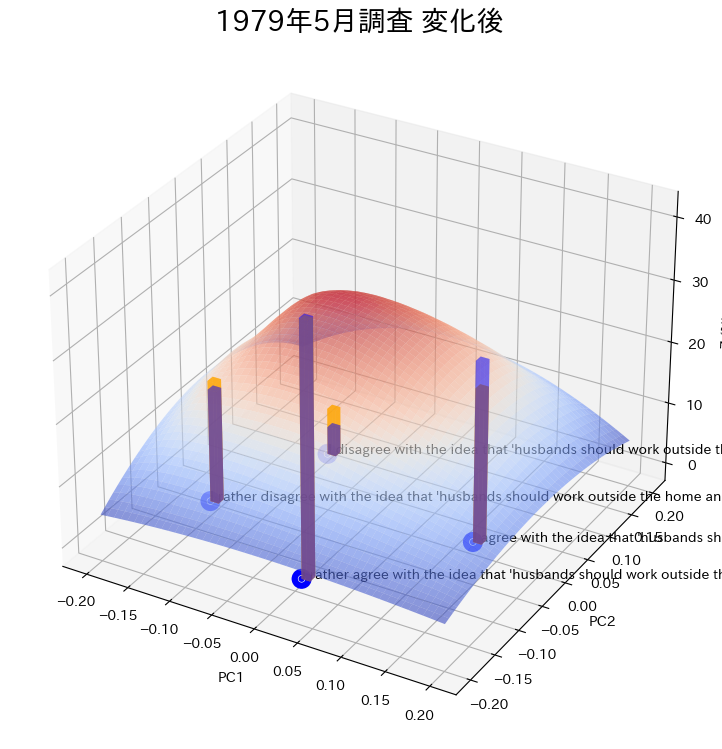

In [258]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.cm as cm

# set up the figure and axes

fig = plt.figure(figsize=(10, 20))
ax2 = fig.add_subplot(211, projection='3d')

ax2.scatter(neww_X[:,0],neww_X[:,1], [0,0,0,0], linewidths=10, color='blue')

vocab=op
for i, word in enumerate(vocab):
  ax2.text(neww_X[i,0], neww_X[i,1], 0, word, zdir=None)

# calculate potential
year1979 = pd.DataFrame({data.iloc[0, 0] : data.iloc[0, 1:]})
year1979['pot'] = -np.log(year1979.iloc[:, 0].astype(np.float64)/100)

chg = []

for i in range(len(init)):
    if i < 2:
        inc = 5*np.random.rand()-5
    else:
        inc = 5*np.random.rand()
    print(inc, init[i])
    chg.append(init[i]+inc)

lst = chg.copy()
lst.append(100-sum(lst))

year1979['変化後'] = lst
year1979['変化後pot'] = -np.log(year1979.iloc[:, 2].astype(np.float64)/100)

# initial bar graph code
x, y, z = neww_X[:,0], neww_X[:,1], init
# print(x, y, z)
top = z
bottom = np.zeros_like(top)
width = 0.01
depth = 0.01
ax2.bar3d(x, y, bottom, width, depth, top, shade=False, color='blue', alpha=0.3)

# changed bar graph code
x, y, z = neww_X[:,0], neww_X[:,1], chg
# print(x, y, z)
top = z
bottom = np.zeros_like(top)
width = 0.01
depth = 0.01
ax2.bar3d(x, y, bottom, width, depth, top, shade=False, color='orange', alpha=0.6)


# border condition
# 4 corner dots
dum = [-0.2, 0.2, -0.2, 0.2]
dumy = [-0.2, 0.2, 0.2, -0.2]

xx = neww_X[:,0].tolist()
yy = neww_X[:,1].tolist()

for l in range(len(dum)):
    xx.append(dum[l]) 
    yy.append(dumy[l])

pot = 10*year1979.iloc[:-1, 3]
zz = pot.to_list()
for m in range(len(dum)):
    zz.append(-np.log(1/100))

# # surface plot code
X, Y, Z = xx, yy, zz

points = np.array([X, Y]).T

X_grid, Y_grid = np.mgrid[-0.2:0.2:50j, -0.2:0.2:50j]
Z_grid = griddata(points, Z, (X_grid, Y_grid), method='cubic')

ax2.plot_surface(X_grid, Y_grid, Z_grid, cmap=cm.coolwarm, 
                       linewidth=0, antialiased=True, alpha=.6)

# ax2.view_init(elev= 25, azim=15, roll=0)

ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('Z (%)')
ax2.set_title("1979年5月調査 変化後",size=20)

# plt.savefig("domestic_pot_1979.png")
plt.show()

-0.7495547297180138 6.5
-0.7495547297180138 24.6
2.250445270281986 38.5
2.250445270281986 24.9
-0.7495547297180138 5.750445270281986
-0.7495547297180138 23.850445270281988
2.250445270281986 40.750445270281986
2.250445270281986 27.150445270281985
-0.7495547297180138 5.000890540563972
-0.7495547297180138 23.100890540563974
2.250445270281986 43.00089054056397
2.250445270281986 29.40089054056397
-0.7495547297180138 4.2513358108459585
-0.7495547297180138 22.35133581084596
2.250445270281986 45.25133581084596
2.250445270281986 31.651335810845957
-0.7495547297180138 3.5017810811279446
-0.7495547297180138 21.601781081127946
2.250445270281986 47.501781081127945
2.250445270281986 33.90178108112794
-0.7495547297180138 2.7522263514099308
-0.7495547297180138 20.852226351409932
2.250445270281986 49.75222635140993
2.250445270281986 36.15222635140993
-0.7495547297180138 2.002671621691917
-0.7495547297180138 20.10267162169192
2.250445270281986 52.00267162169192
2.250445270281986 38.402671621691916
-0.74

C:\Users\so030\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\so030\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\so030\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\so030\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: in

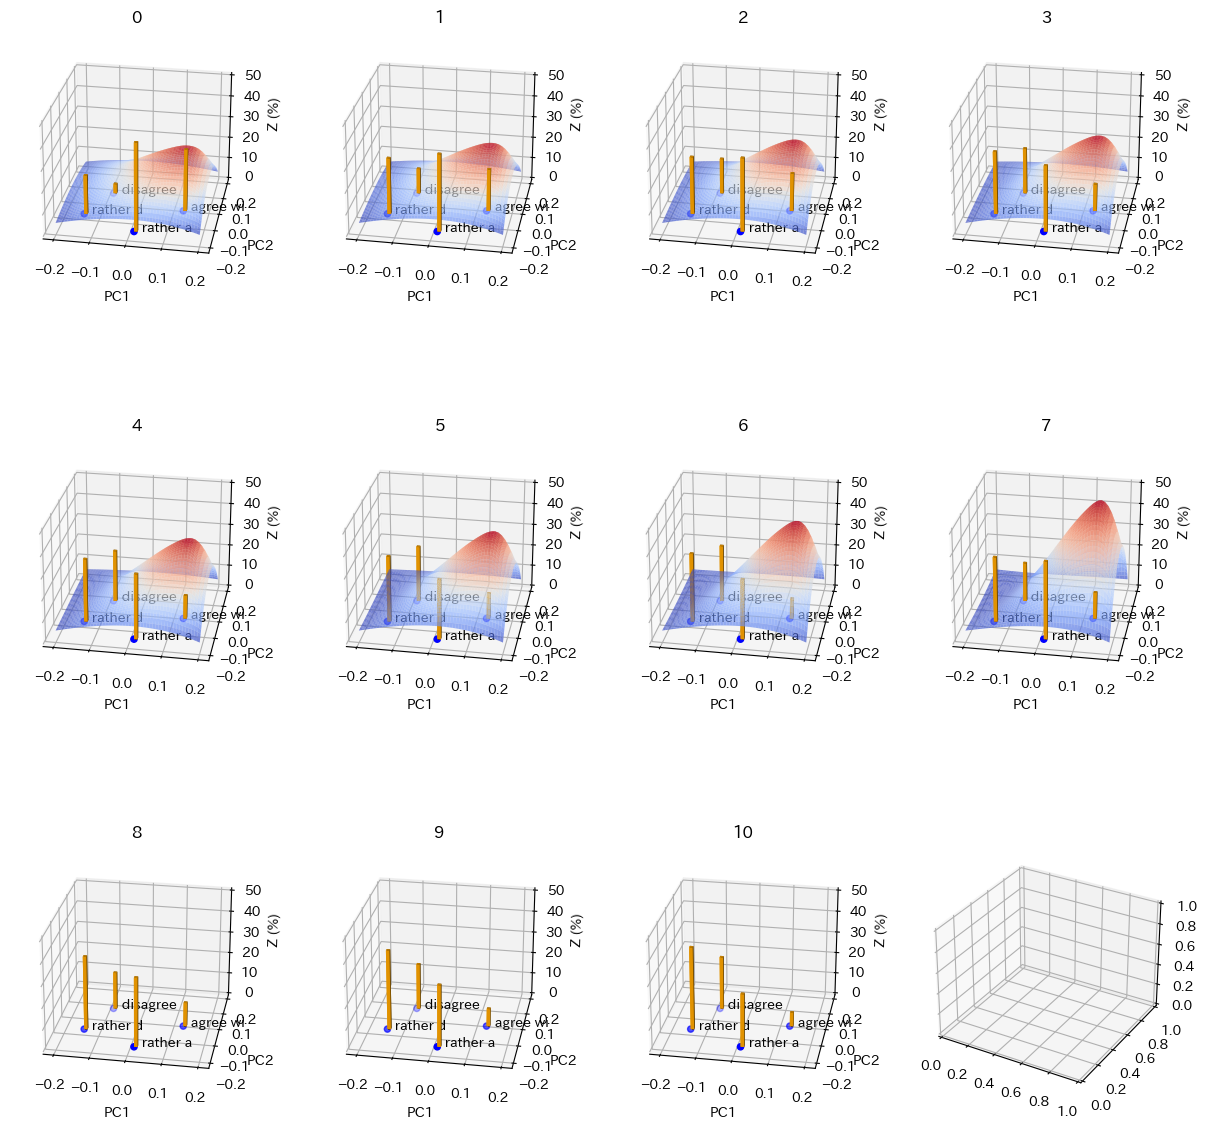

In [276]:
fig, axes = plt.subplots(3, 4, figsize=(15,15), subplot_kw={'projection': '3d'})

h = 0

init = year1979.iloc[:-1, 0].astype(np.float64).tolist()

for i in range(3):
    for j in range(4):

        axes[i][j].scatter(neww_X[:,0], neww_X[:,1], [0,0,0,0], linewidths=1,color='blue')
        vocab=op
        for k, word in enumerate(vocab):
            axes[i][j].text(neww_X[k,0], neww_X[k,1], 0, word[:10], zdir=None)

        # calculate potential
        year1979 = pd.DataFrame({data.iloc[h, 0] : data.iloc[h, 1:]})
        year1979['pot'] = -np.log(year1979.iloc[:, 0].astype(np.float64)/100)

        # initial bar graph code
        x, y, z = neww_X[:,0], neww_X[:,1], init
        # print(x, y, z)
        top = z
        bottom = np.zeros_like(top)
        width = 0.01
        depth = 0.01
        ax2.bar3d(x, y, bottom, width, depth, top, shade=False, color='blue', alpha=0.3)

        chg = []

        for s in range(len(init)):
            np.random.seed(303)
            if s < 2:
                inc = 3*np.random.rand()-3
            else:
                inc = 3*np.random.rand()
            print(inc, init[s])
            chg.append(init[s]+inc)

        lst = chg.copy()
        lst.append(100-sum(lst))

        year1979['変化後'] = lst
        year1979['変化後pot'] = -np.log(year1979.iloc[:, 2].astype(np.float64)/100)

        # bar graph code
        x, y, z = neww_X[:,0], neww_X[:,1], year1979.iloc[:-1, 0].astype(np.float64).tolist()
        
        top = z
        bottom = np.zeros_like(top)
        width = 0.01
        depth = 0.01
        axes[i][j].bar3d(x, y, bottom, width, depth, top, shade=True, color='orange')
        axes[i][j].set_title("%i" %h)
        h += 1
        init = chg

        # # surface plot code

        dum = [-0.2, 0.2, -0.2, 0.2]
        dumy = [-0.2, 0.2, 0.2, -0.2]

        xx = neww_X[:,0].tolist()
        yy = neww_X[:,1].tolist()

        for l in range(len(dum)):
            xx.append(dum[l]) 
            yy.append(dumy[l])

        zz = 10*year1979.iloc[:-1, 3]
        zz = zz.to_list()
        for m in range(len(dum)):
            zz.append(-np.log(1/100))
        
        X, Y, Z = xx, yy, zz

        points = np.array([X, Y]).T

        # # create a grid of coordinates between the minimum and
        # # maximum of your X and Y. 50j indicates 50 discretization
        # # points between the minimum and maximum.
        X_grid, Y_grid = np.mgrid[-0.2:0.2:50j, -0.2:0.2:50j]
        # # interpolate your values on the grid defined above
        Z_grid = griddata(points, Z, (X_grid, Y_grid), method='cubic')

        axes[i][j].plot_surface(X_grid, Y_grid, Z_grid, cmap=cm.coolwarm, 
                            linewidth=0, antialiased=True, alpha=.7)

        axes[i][j].set_zlim(0, 50)

        axes[i][j].view_init(elev= 25, azim=280, roll=0)

        axes[i][j].set_xlabel("PC1")
        axes[i][j].set_ylabel("PC2")
        axes[i][j].set_zlabel("Z (%)")

        if h == 11:
            break

